## Load Data

In [1]:
# Load the Excel file data in sheet number 2 using pandas
import pandas as pd
pd.set_option("display.max_columns", None)

# Load the Excel file data in sheet number 2 using pandas, use the first row as the column names
df = pd.read_excel("Case Study for Data Scientist.xlsx", sheet_name="Sheet1", header=0)
df.head()

,Day,Date,Region,Mill Code,Mill Type,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
0,Wed,2020-01-01,R01,Z001,IP,0.00,300.000000,95.157670,1.241942,4.734563,6.833731,0.000000,15.721261,0.000000,0.000000,0.000,31.114312,0.0,68.885688,49.290868,50.709132
1,Thu,2020-01-02,R01,Z001,IP,22.27,289.458286,95.430159,1.859710,3.931418,7.475889,3.342912,13.950932,1.387521,0.254744,648.373,39.927122,0.0,60.072878,46.188086,53.811914
2,Fri,2020-01-03,R01,Z001,IP,22.55,262.890977,94.617481,1.514098,3.568296,7.416632,24.355107,13.322048,1.484348,0.058243,530.021,37.392953,0.0,62.607047,45.361864,54.638136
3,Sat,2020-01-04,R01,Z001,IP,22.12,262.653835,95.404031,1.457055,4.809152,7.225248,1.208765,14.120394,1.364690,0.099324,702.527,33.681927,0.0,66.318073,51.698756,48.301244
4,Sun,2020-01-05,R01,Z001,IP,0.00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN


In [2]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)
print(len(categorical_features))

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
#numerical_features = numerical_features.drop('Actual OER %')
print(numerical_features)
print(len(numerical_features))

label = 'Actual OER %'


Index(['Day', 'Region', 'Mill Code', 'Mill Type'], dtype='object')
4
Index(['Actual OER %', 'Crop Freshness Score', 'Ripe %', 'Long Stalk %',
       'Rat Damage %', 'Loose Fruits %', 'Rainfall (mm)',
       'Age Profile (years)', 'Total Oil Losses %', 'Downtime %',
       'FFB Processed (MT)', 'Seed A %', 'Seed B %', 'Other Seeds %',
       'Coastal %', 'Inland %'],
      dtype='object')
16


## Feature Engineering

In [3]:
# ZO22 is chosen as the mill code to be analyzed
zo22 = df[df['Mill Code'] == 'Z022']
# set the Date as the index
zo22 = zo22.set_index('Date')
zo22.head(10)


,Day,Region,Mill Code,Mill Type,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
Date,,,,,,,,,,,,,,,,,,,,
2020-01-01,Wed,R04,Z022,IP,20.35,296.777917,77.031644,2.207673,14.028534,5.919710,0.287178,13.029043,1.261184,0.125803,511.405,4.472428,0.0,95.527572,0.0,100.0
2020-01-02,Thu,R04,Z022,IP,20.51,267.854639,85.720531,2.248377,14.948637,8.655752,3.334981,12.278802,1.464456,0.066092,518.319,4.966389,0.0,95.033611,0.0,100.0
2020-01-03,Fri,R04,Z022,IP,21.30,267.452850,85.708630,1.381812,13.041987,6.562387,3.191424,11.611554,1.252361,0.178279,435.348,6.638849,0.0,93.361151,0.0,100.0
2020-01-04,Sat,R04,Z022,IP,20.15,274.061410,85.165413,2.599849,12.903222,6.495598,0.000000,11.714539,1.182214,0.036554,549.164,8.743589,0.0,91.256411,0.0,100.0
2020-01-05,Sun,R04,Z022,IP,0.00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-06,Mon,R04,Z022,IP,21.83,300.000000,83.111808,2.594010,10.559147,7.809587,13.234215,12.856042,1.493988,0.146752,537.546,5.553637,0.0,94.446363,0.0,100.0
2020-01-07,Tue,R04,Z022,IP,21.74,269.436603,83.380961,2.157992,12.599063,7.279364,0.552664,13.869995,1.453156,0.097292,595.787,2.693918,0.0,97.306082,0.0,100.0
2020-01-08,Wed,R04,Z022,IP,21.52,273.798453,81.619159,2.041962,13.342093,7.328390,0.450991,14.674018,1.529618,0.127397,628.274,1.721227,0.0,98.278773,0.0,100.0
2020-01-09,Thu,R04,Z022,IP,21.74,272.847626,84.788061,1.772059,12.646855,6.810884,0.054258,14.190942,1.320507,0.107420,589.103,10.251145,0.0,89.748855,0.0,100.0


In [4]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
lgbm = lgb.LGBMRegressor()

def train_model(model, X_train, y_train, X_test, y_test, df):
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate the R^2 score
    r2 = r2_score(y_test, y_pred)
    print("R^2 Score:", r2)

    # Calculate the RMSE
    rmse = mse ** 0.5
    print("Root Mean Squared Error:", rmse)

    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)

    # Calculate the MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print("Mean Absolute Percentage Error:", mape)

    # Plot the predicted vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual OER %")
    plt.ylabel("Predicted OER %")
    plt.title("Actual OER % vs Predicted OER %")
    plt.plot([0, 100], [0, 100], color='r', linestyle='--')
    plt.show()

    # Calculate the residuals
    residuals = y_test - y_pred

    # Plot the residuals
    # plt.scatter(y_test, residuals)
    # plt.xlabel("Actual OER %")
    # plt.ylabel("Residuals")
    # plt.title("Actual OER % vs Residuals")
    # plt.axhline(y=0, color='r', linestyle='--')
    # plt.show()

    # Plot the residuals vs predicted values
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted OER %")
    plt.ylabel("Residuals")
    plt.title("Predicted OER % vs Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    # Plot the residuals distribution
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residuals Distribution")
    plt.show()


    # from df, use all the numerical features except the label and use the model to predict the label across all the data
    # X = df.drop(label, axis=1)
    # y_pred_all = model.predict(X)
    # df['Predicted OER %'] = y_pred_all
    # plot the line chart of the actual OER %
    # plt.plot(df.index, df[label], label='Actual OER %')
    # # plot the line chart of the predicted OER %
    # plt.plot(df.index, df['Predicted OER %'], label='Predicted OER %')
    # plt.xlabel('Date')
    # plt.ylabel('OER %')
    # plt.title('Actual vs Predicted OER %')
    # plt.legend()
    # plt.show()

    return model


/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                 Feature       VIF
0           Actual OER %  3.158458
1   Crop Freshness Score  1.230234
2                 Ripe %  1.207484
3           Long Stalk %  1.290943
4           Rat Damage %  1.072650
5         Loose Fruits %  1.162910
6          Rainfall (mm)  1.037387
7    Age Profile (years)  1.086377
8     Total Oil Losses %  1.506128
9             Downtime %  1.325598
10    FFB Processed (MT)  2.280633
11              Seed A %       inf
12              Seed B %       NaN
13         Other Seeds %       inf
14             Coastal %       NaN
15              Inland %  0.000000
0.0
31.60725397813139
-0.004427016224608255


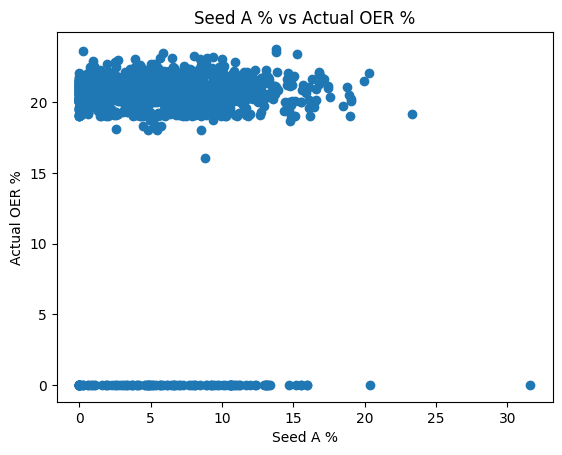

68.39274602186862
100.0
0.004427016224608301


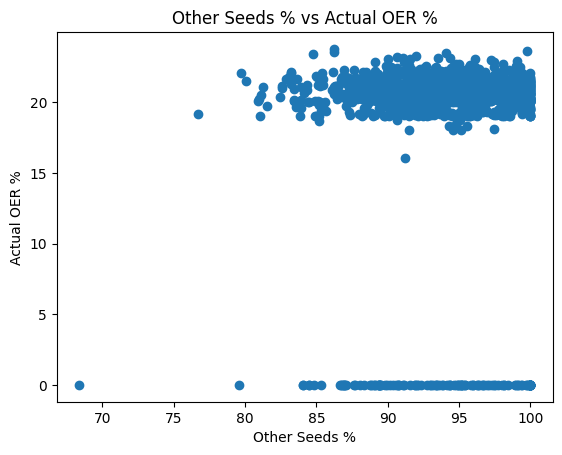

In [5]:
# Index(['Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
#       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
#       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
#       'Seed B %', 'Other Seeds %', 'Coastal %', 'Inland %'],
#      dtype='object')

zo22_df = zo22.copy()

# drop null values in zo22_df (R^2 Score: 0.63, rmse: 3.40)
zo22_df = zo22_df.dropna()

# remove rows where Actual OER % is 0
# zo22_df = zo22_df[zo22_df['Actual OER %'] != 0]

# using necessary features (R^2 Score: 0.63, rmse: 3.40)
refined_features = numerical_features.drop([label, 'Other Seeds %', 'Seed B %', 'Inland %', 'Total Oil Losses %'])
X = zo22_df[refined_features]

# using numerical features R^2 Score: 0.73, rmse: 2.93
# X = zo22_df[numerical_features].drop(label, axis=1)
# drop Other Seeds % as it has a high correlation with Seed A % and Seed B %

y = zo22_df[label]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check multicollinearity  using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for intercept
X = add_constant(zo22_df[numerical_features])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# filter the data to only include Actual OER % < 0
zo22_df_oerzero = zo22_df[zo22_df['Actual OER %'] < 1]
zo22_df_oerzero.head()

# print the Seed A %
print(zo22_df['Seed A %'].min())
print(zo22_df['Seed A %'].max())
print(zo22_df['Seed A %'].corr(zo22_df['Actual OER %']))
# plot the scatter plot of Seed A % vs Actual OER %
plt.scatter(zo22_df['Seed A %'], zo22_df['Actual OER %'])
plt.xlabel('Seed A %')
plt.ylabel('Actual OER %')
plt.title('Seed A % vs Actual OER %')
plt.show()

# print the Other Seeds %
print(zo22_df['Other Seeds %'].min())
print(zo22_df['Other Seeds %'].max())
print(zo22_df['Other Seeds %'].corr(zo22_df['Actual OER %']))
# plot the scatter plot of Other Seeds % vs Actual OER %
plt.scatter(zo22_df['Other Seeds %'], zo22_df['Actual OER %'])
plt.xlabel('Other Seeds %')
plt.ylabel('Actual OER %')
plt.title('Other Seeds % vs Actual OER %')
plt.show()


In [6]:
zo22_df.head(30)
# print the min max of Actual OER %
print(zo22_df['Actual OER %'].min())
print(zo22_df['Actual OER %'].max())

# filter the data to only include Actual OER % > 23%
zo22_df_oerhigh = zo22_df[zo22_df['Actual OER %'] > 23]

# filter the data to only include ACtual OER % < 1%
zo22_df_oerzero = zo22_df[zo22_df['Actual OER %'] < 1]

0.0
23.76


In [7]:
print(zo22_df_oerhigh['Day'].value_counts())
zo22_df_oerhigh.head()
zo22_df_oerhigh.describe()

Day
Fri    3
Sat    2
Wed    2
Sun    2
Thu    2
Tue    1
Mon    1
Name: count, dtype: int64


,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.0,13.0
mean,23.280000,268.815341,82.564262,1.338002,18.085376,9.070314,7.017627,13.424071,1.353486,0.204262,763.787769,8.436252,0.0,91.563748,0.0,100.0
std,0.246712,25.434681,3.882001,0.416385,3.169722,2.073379,13.117523,1.090987,0.249867,0.098461,279.496460,4.219258,0.0,4.219258,0.0,0.0
min,23.020000,200.000000,73.255702,0.588582,11.811303,5.673256,0.000000,12.022153,1.042888,0.085310,315.353000,0.215943,0.0,84.734359,0.0,100.0
25%,23.100000,261.753488,80.599289,1.153314,16.765424,8.325267,0.269180,12.351415,1.170785,0.139821,519.668000,5.882391,0.0,90.006783,0.0,100.0
50%,23.210000,276.506032,82.123736,1.250005,17.741374,9.021857,1.963458,13.417190,1.194432,0.150181,796.066000,8.465658,0.0,91.534342,0.0,100.0
75%,23.450000,281.861802,86.001716,1.544992,20.971497,10.801165,2.613295,14.210129,1.529789,0.300384,932.984000,9.993217,0.0,94.117609,0.0,100.0
max,23.760000,296.704648,86.443002,2.223776,22.486477,12.208718,43.915980,15.173057,1.783631,0.396920,1152.579000,15.265641,0.0,99.784057,0.0,100.0


In [8]:
# count the data in the 'Day' column
print(zo22_df_oerzero['Day'].value_counts())

zo22_df_oerzero.head()
zo22_df_oerzero.describe()


Day
Sun    72
Mon    14
Thu    12
Wed    10
Tue     9
Fri     5
Sat     4
Name: count, dtype: int64


,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
count,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0,126.0,126.0,126.000000,126.0,126.000000,126.0,126.0
mean,0.0,263.203088,79.117185,2.008990,21.356445,8.941235,10.935935,13.080670,0.0,0.0,0.0,6.194538,0.0,93.805462,0.0,100.0
std,0.0,27.657880,5.386833,1.008697,4.256675,4.148040,16.105579,1.444196,0.0,0.0,0.0,5.443209,0.0,5.443209,0.0,0.0
min,0.0,192.094505,59.574210,0.330694,11.614084,0.000000,0.000000,10.108381,0.0,0.0,0.0,0.000000,0.0,68.392746,0.0,100.0
25%,0.0,249.947541,76.571954,1.285031,18.381910,6.563305,0.000000,12.238303,0.0,0.0,0.0,1.005138,0.0,89.589234,0.0,100.0
50%,0.0,265.470742,80.082637,1.806568,20.790150,8.657783,3.492369,13.020434,0.0,0.0,0.0,5.282172,0.0,94.717828,0.0,100.0
75%,0.0,284.353988,83.016968,2.441069,23.949938,11.163243,15.346683,13.919025,0.0,0.0,0.0,10.410766,0.0,98.994862,0.0,100.0
max,0.0,300.000000,87.620583,5.554041,35.612869,20.343326,98.730296,18.332744,0.0,0.0,0.0,31.607254,0.0,100.000000,0.0,100.0


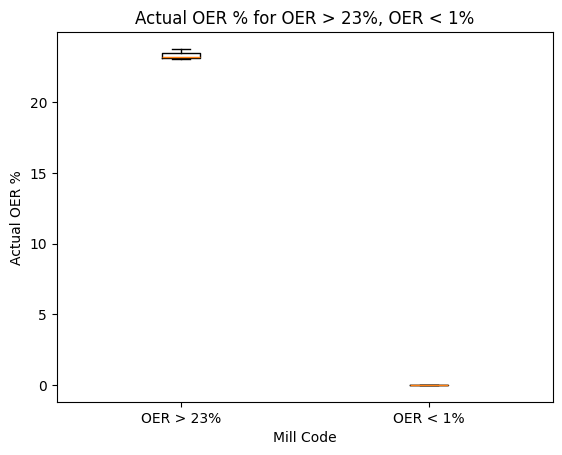

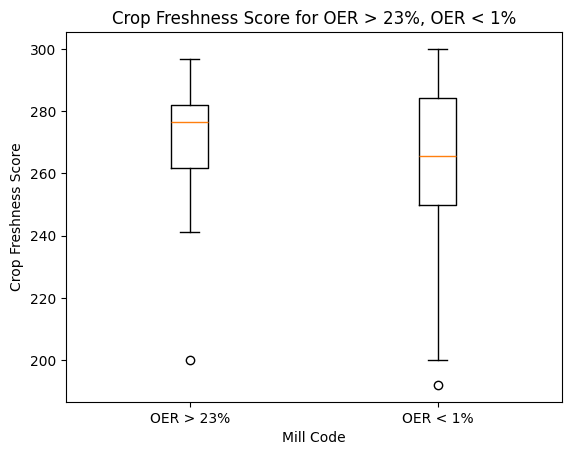

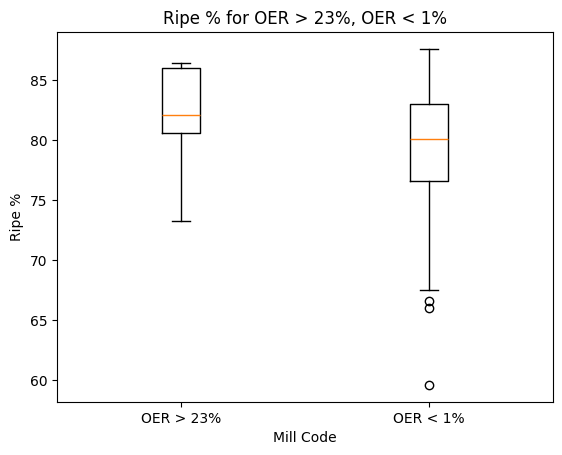

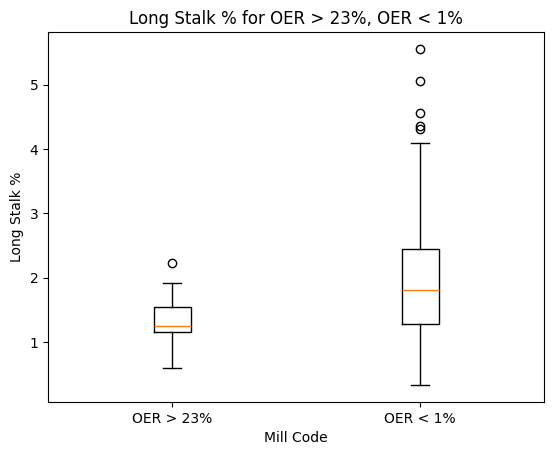

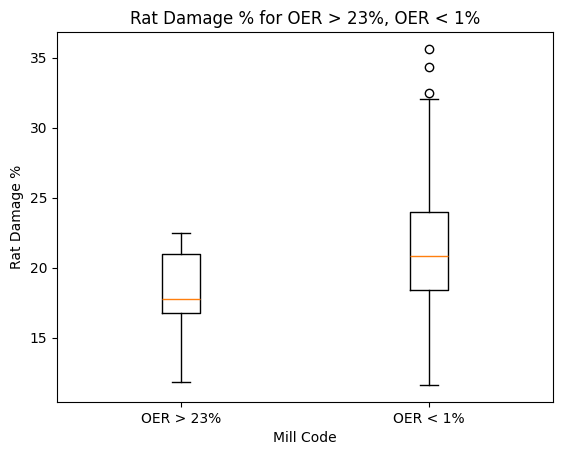

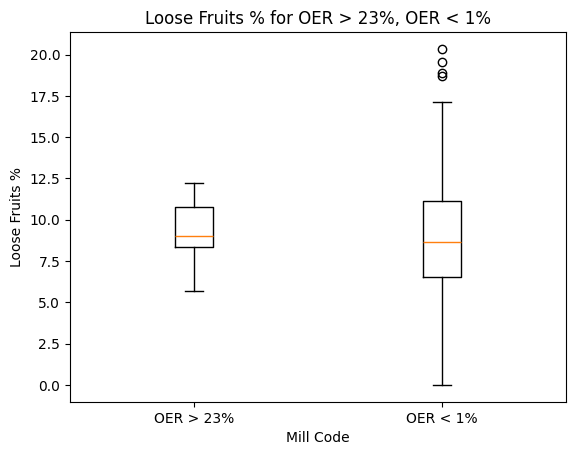

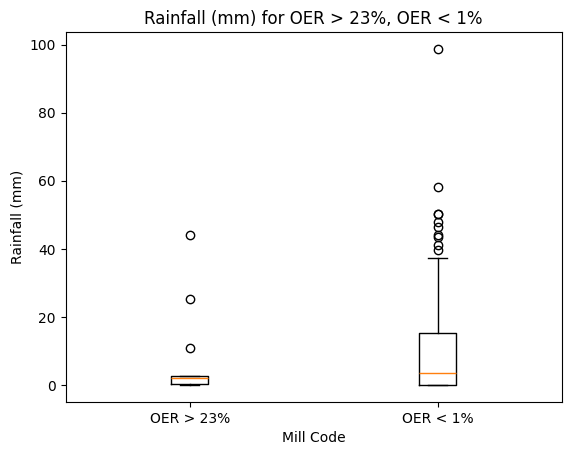

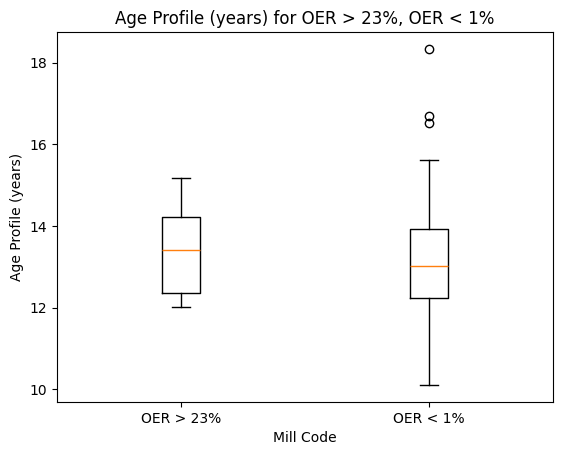

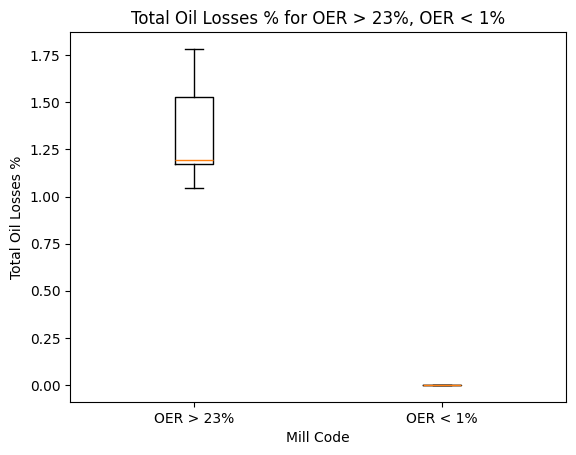

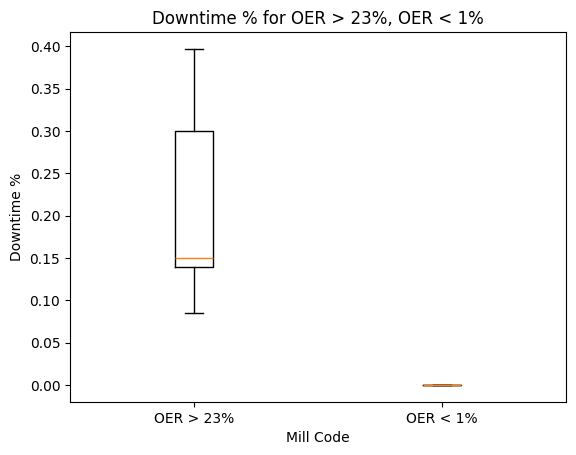

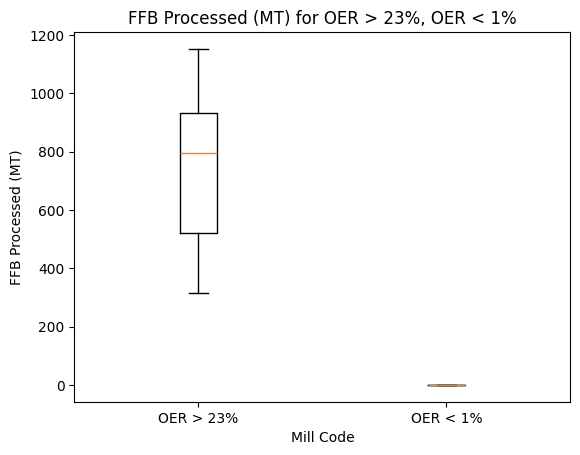

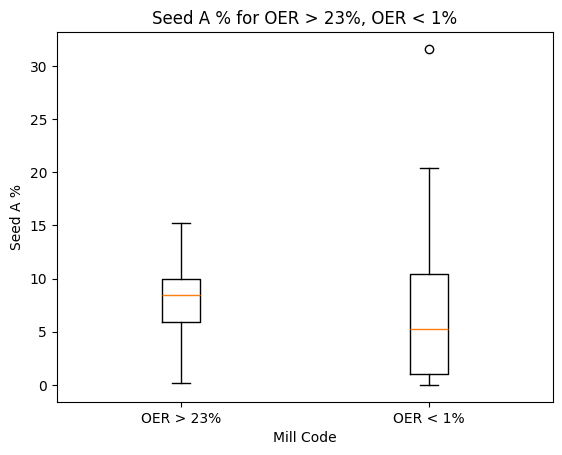

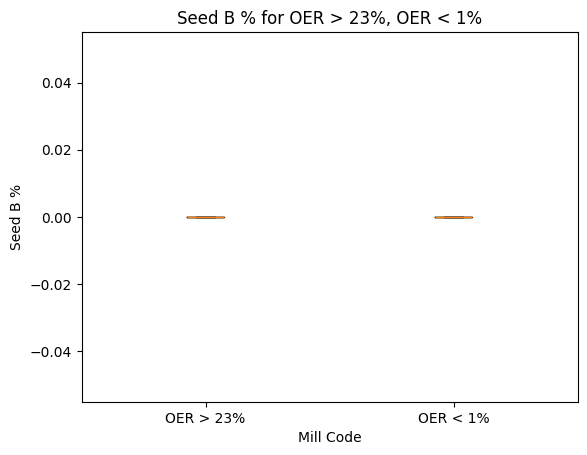

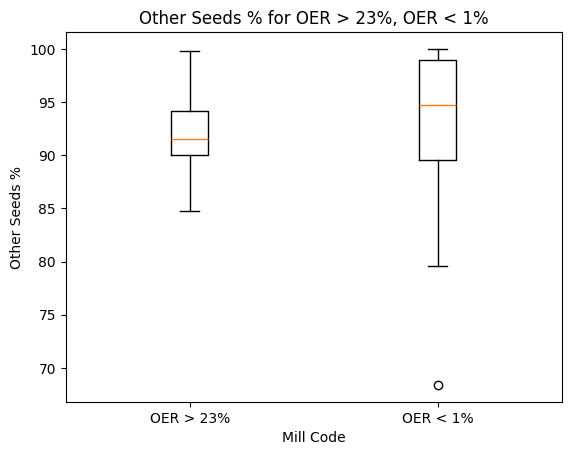

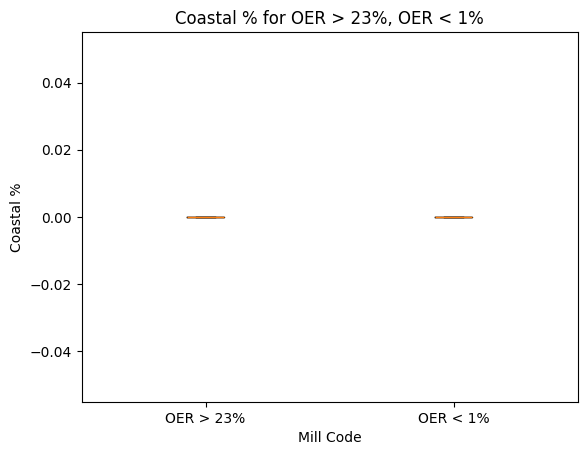

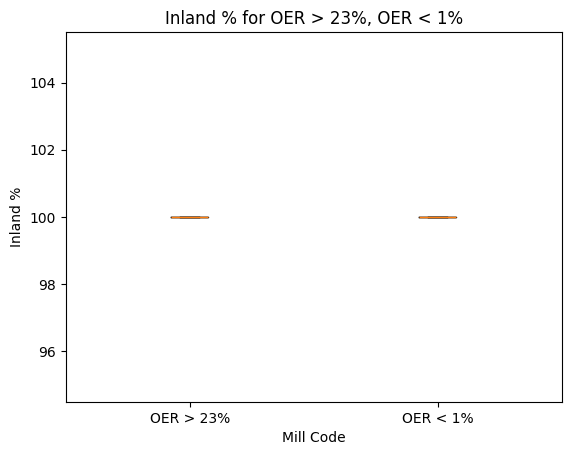

In [9]:
def compare_box_plots(df1, df2, df_name1, df_name2):
    for feature in numerical_features:
        plt.boxplot([df1[feature], df2[feature]])
        plt.xlabel("Mill Code")
        plt.ylabel(feature)
        plt.title(f"{feature} for {df_name1}, {df_name2}")
        plt.xticks([1, 2], [df_name1, df_name2])
        plt.show()

compare_box_plots(zo22_df_oerhigh, zo22_df_oerzero, "OER > 23%", "OER < 1%")

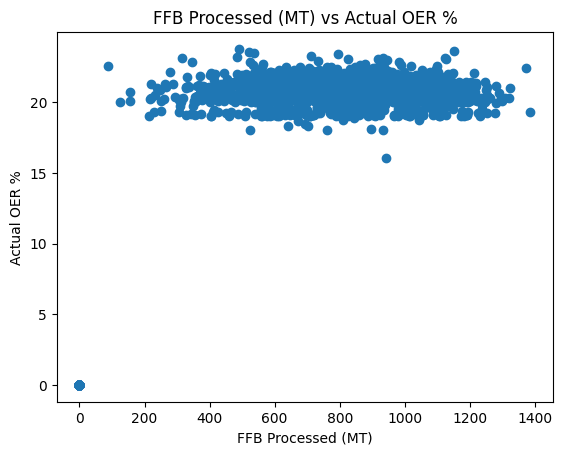

In [10]:
# Plot a scatter plot of FFB Processed (MT) vs Actual OER %
plt.scatter(zo22_df['FFB Processed (MT)'], zo22_df['Actual OER %'])
plt.xlabel('FFB Processed (MT)')
plt.ylabel('Actual OER %')
plt.title('FFB Processed (MT) vs Actual OER %')
plt.show()


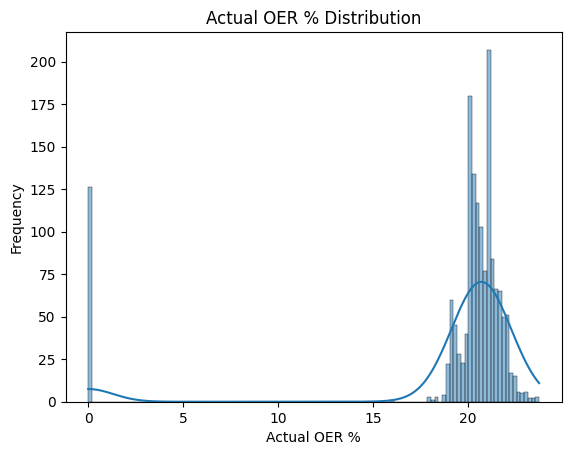

In [11]:
# Plot the histogram of the Actual OER % from zo22_df
sns.histplot(zo22_df['Actual OER %'], kde=True)
plt.xlabel("Actual OER %")
plt.ylabel("Frequency")
plt.title("Actual OER % Distribution")
plt.show()

In [30]:
# Filter the data to only include FFB Processed (MT) < 1
zo22_df_ffbzero = zo22_df[zo22_df['FFB Processed (MT)'] < 100]


test = zo22_df[zo22_df['Actual OER %'] < 17]
test.head()
print(test['Actual OER %'].min())
print(test['Actual OER %'].max())


0.0
16.03
